In [90]:
from random import random, sample
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import sys
import os
import time
import re
import json
 
import requests
from urllib.parse import quote as urlencode

In [91]:
from tensorflow.keras.metrics import MAE, MSE
import tensorflow as tf

In [270]:
%run FWHM.ipynb

In [93]:
%run PSNR.ipynb

In [171]:
model = tf.keras.models.load_model("C:\\Users\\kullanıcı\\Desktop\\YAD_04A\\Model5.keras", compile=False)

In [172]:
model.compile(loss = ["mae"], optimizer = "adam")

In [225]:
og_dir = "E:\\YAD\\YAD_İşlenmiş_Düzgün\\Test\\idgg58010_drz.fitssec8.npysec0.npy"
pred_dir = "H:\\pred\\predmapidgg58010_drz.fitssec8.npysec0.npy"

dist = np.load(og_dir)[0].reshape(512, 512, 1)
clean = np.load(og_dir)[1].reshape(512, 512, 1)
pred = model.predict(dist.reshape(1,512,512,1))[0] + dist
pred1 = np.load(pred_dir)[0] + dist

pred[pred < 0] = 0
pred1[pred1 < 0] = 0

1/1 [==============================] - 0s 335ms/step


Text(0.5, 1.0, 'BOZUK')

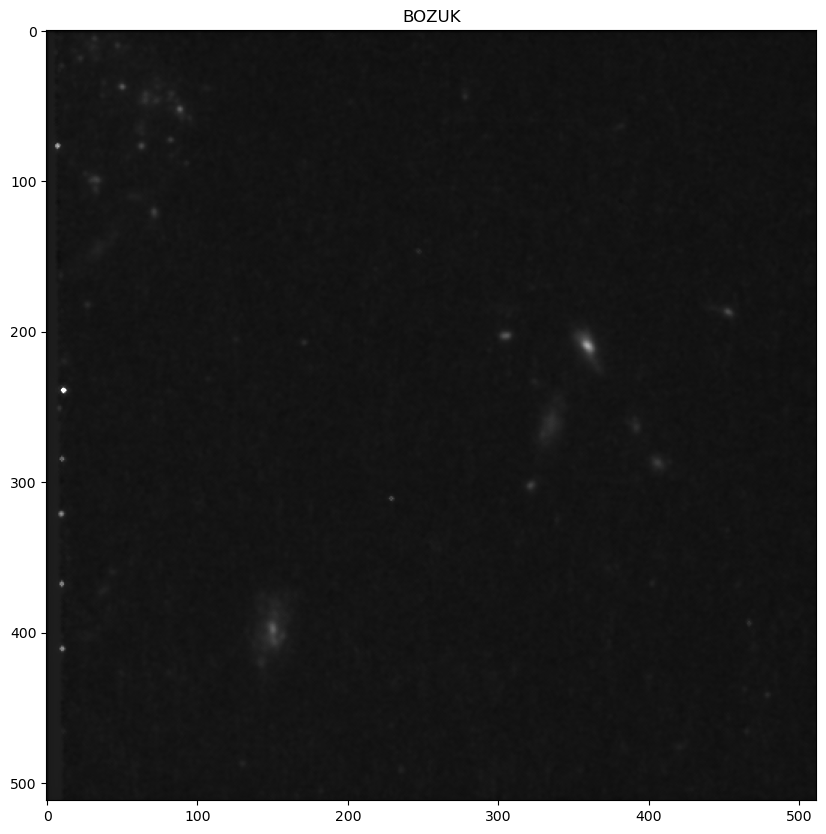

In [226]:
plt.figure(figsize = (10,10))
plt.imshow(dist, vmin = 0.0, vmax = 0.1, cmap = "gray")
plt.title("BOZUK")


Text(0.5, 1.0, 'TEMİZ')

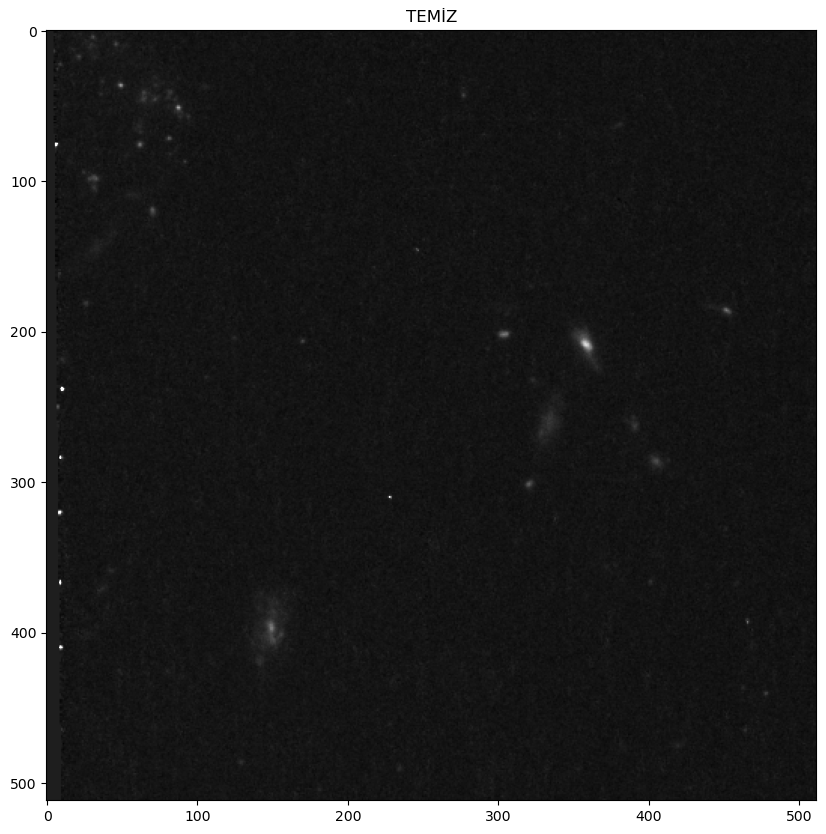

In [227]:
plt.figure(figsize = (10,10))
plt.imshow(clean, vmin = 0.0, vmax = 0.1, cmap = "gray")
plt.title("TEMİZ")

Text(0.5, 1.0, 'TAHMİN')

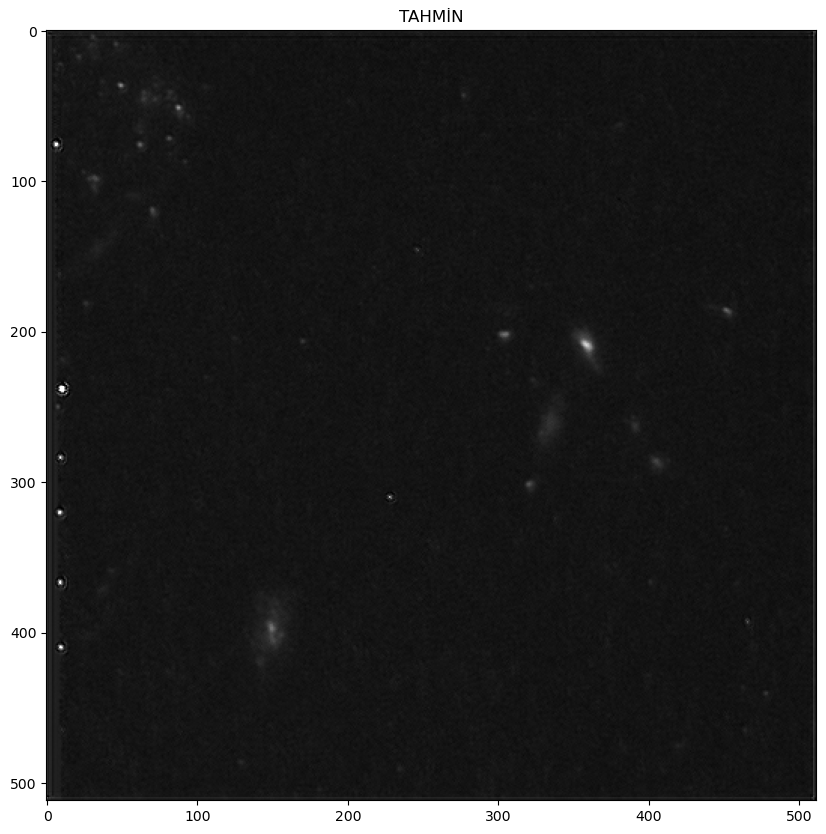

In [268]:
plt.figure(figsize = (10,10))
plt.imshow(pred1, vmin = 0.0, vmax = 0.1, cmap = "gray")
plt.title("TAHMİN")

In [231]:
print(tf.reduce_mean(MAE(clean, dist)))
print(tf.reduce_mean(MAE(clean, pred1)))

tf.Tensor(0.0010218268185067014, shape=(), dtype=float64)
tf.Tensor(0.0007225986789006929, shape=(), dtype=float64)


In [238]:
print(tf.reduce_mean(MSE(clean, dist)))
print(tf.reduce_mean(MSE(clean, pred1)))

tf.Tensor(6.832036154857027e-06, shape=(), dtype=float64)
tf.Tensor(3.035947233742025e-06, shape=(), dtype=float64)


In [243]:
print(psnr(clean, dist))
print(psnr(clean, pred1))

51.65449844044262
55.17705780962926


In [267]:
clean_fwhm = fwhm(clean)
dist_fwhm = fwhm(dist)
pred_fwhm = fwhm(pred1)

clean_avg_fwhm = 0
dist_avg_fwhm = 0
pred_avg_fwhm = 0

if (clean_fwhm is not None) and (dist_fwhm is not None)and (pred_fwhm is not None):

    clean_avg_fwhm = np.mean(clean_fwhm)
    dist_avg_fwhm = np.mean(dist_fwhm)
    pred_avg_fwhm = np.mean(pred_fwhm) 
    
else:
    clean_avg_fwhm = -1
    dist_avg_fwhm = -1
    pred_avg_fwhm = -1

76
6
75
(0,)
63
7
76
(0,)
59
10
238
(0,)


In [255]:
print(clean_fwhm)
print(dist_fwhm)
print(pred_fwhm)

print(clean_avg_fwhm)
print(dist_avg_fwhm)
print(pred_avg_fwhm)

None
None
None
-1
-1
-1


In [138]:
a = np.array([1,2,3,4])
a[:9]

array([1, 2, 3, 4])

In [143]:
clean_fwhm

[1.0503231627276264, 3.0844275857165, 96.75523709997692]

In [144]:
dist_fwhm

[-1, 2.8049986575756782, 3.4455608509561944]